In [14]:
# Task 2: Stock Price Prediction

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load Data from Yahoo Finance
ticker = 'AAPL'  # We can change to 'TSLA', 'GOOGL', etc.
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
data.head()

/tmp/ipython-input-9-524236654.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [10]:
# Prepare Features and Target
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df['Next_Close'] = df['Close'].shift(-1)  # Target is next day's close

In [11]:
# Drop last row (since Next_Close will be NaN)
df.dropna(inplace=True)

# Features & Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred):.4f}")

R² Score: 0.9579
RMSE: 4.9761


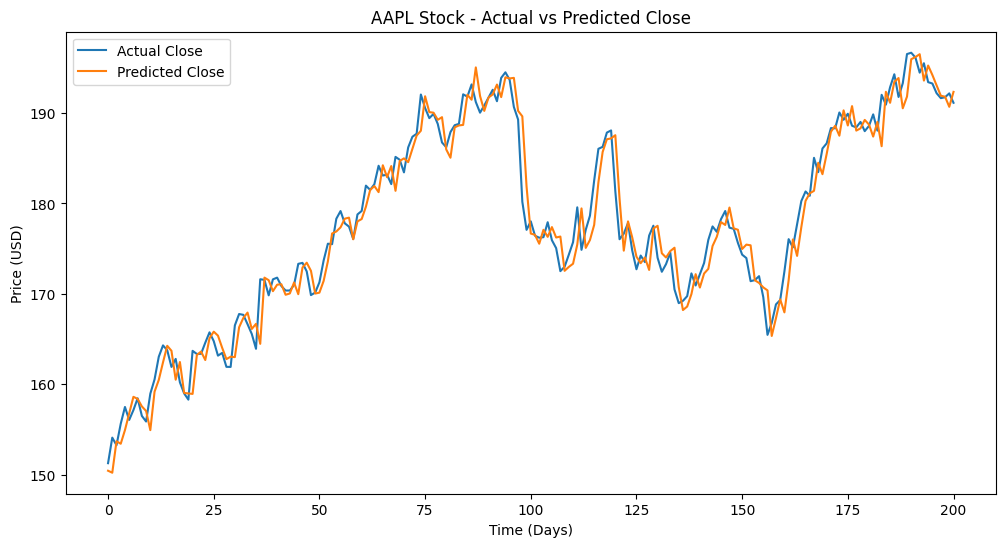

In [13]:
# Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close')
plt.plot(y_pred, label='Predicted Close')
plt.title(f'{ticker} Stock - Actual vs Predicted Close')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

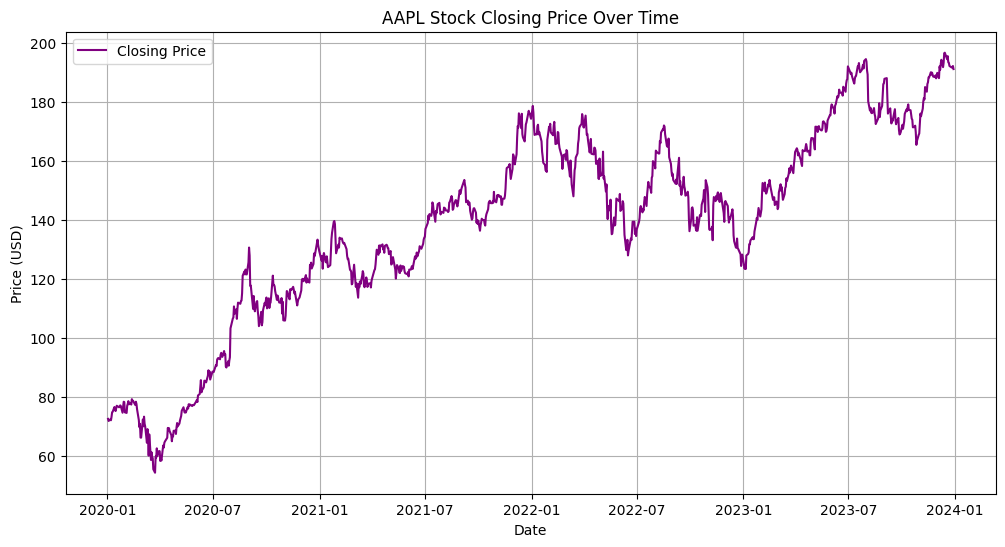

In [16]:
# Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='purple')
plt.title(f'{ticker} Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

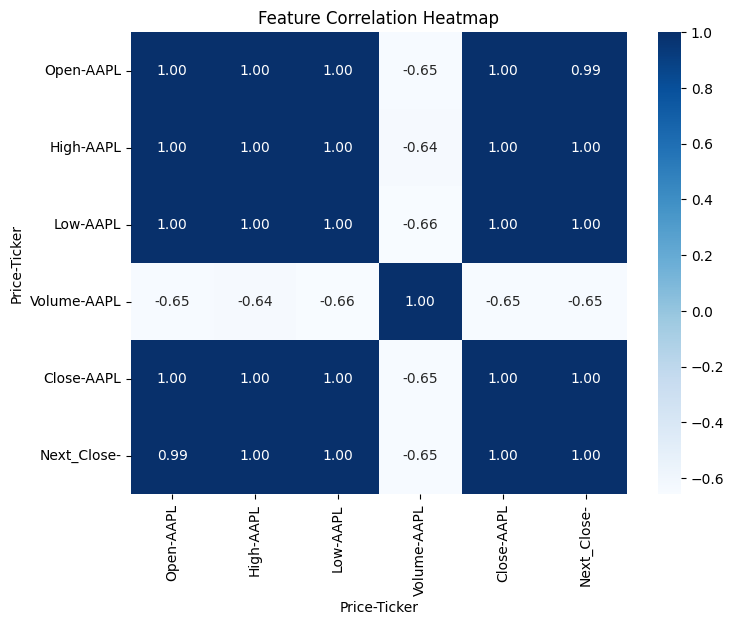

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [18]:
!pip install plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.update_layout(title=f'{ticker} Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()